# Tidy Data Project

## Importing and Setup

### First, I need to important the data, along with pandas. I also have to get familiar with the data and create an initial dataframe.

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

medalists = pd.read_csv('data/olympics_08_medalists.csv')
medalists.head(10)

,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
0,Aaron Armstrong,NaN,NaN,gold,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Peirsol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdullo Tangriev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abeer Abdelrahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bronze,NaN,NaN,NaN
4,Abhinav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Acer Nethercott,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Adam Korol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Adam Kreek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Adam Pine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Adam Wheeler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bronze


## Long-Form

### To begin transforming the data into tidy data, we need to convert it from wide-form to long-form

In [80]:
melted_medalists = pd.melt(medalists,
                           id_vars='medalist_name',
                           var_name='Competition',
                           value_name='Medal')
melted_medalists.head(10)

,medalist_name,Competition,Medal
0,Aaron Armstrong,male_archery,NaN
1,Aaron Peirsol,male_archery,NaN
2,Abdullo Tangriev,male_archery,NaN
3,Abeer Abdelrahman,male_archery,NaN
4,Abhinav,male_archery,NaN
5,Acer Nethercott,male_archery,NaN
6,Adam Korol,male_archery,NaN
7,Adam Kreek,male_archery,NaN
8,Adam Pine,male_archery,NaN
9,Adam Wheeler,male_archery,NaN


## Data Cleansing

### Now that the data is long-form, we just have to complete a couple more steps before our data has tidy data principles, and is also clean and organized.

In [81]:
dropped_medalists = melted_medalists.dropna()
dropped_medalists[['Gender', 'Competition']] = dropped_medalists['Competition'].str.split('_', expand=True)
clean_medalists= dropped_medalists.rename(columns = {'medalist_name' : 'Name'})
for row in clean_medalists:
    clean_medalists['Competition']=clean_medalists['Competition'].str.title()
    clean_medalists['Gender']=clean_medalists['Gender'].str.title()
    clean_medalists['Medal']=clean_medalists['Medal'].str.title()
clean_medalists.head(10)

/var/folders/8s/0qnc0cd90gsdgkkzdvk15dnr0000gn/T/ipykernel_58605/1797714024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_medalists[['Gender', 'Competition']] = dropped_medalists['Competition'].str.split('_', expand=True)


,Name,Competition,Medal,Gender
177,Bair Badënov,Archery,Bronze,Male
676,Ilario Di Buò,Archery,Silver,Male
682,Im Dong-hyun,Archery,Gold,Male
760,Jiang Lin,Archery,Bronze,Male
920,Lee Chang-hwan,Archery,Gold,Male
950,Li Wenquan,Archery,Bronze,Male
1043,Marco Galiazzo,Archery,Silver,Male
1107,Mauro Nespoli,Archery,Silver,Male
1314,Park Kyung-mo,Archery,Silver,Male
1710,Viktor Ruban,Archery,Gold,Male


## Visualizations

### Now our data is clean, and follows the tidy data principles! This makes it much easier for us to summarize and manipulate our data, which in turn helps us obtain findings within it.

Medal   Bronze  Gold  Silver
Gender                      
Female     294   271     278
Male       374   315     343


Text(0.5, 1.0, 'Medal Breakdown by Gender and Color')

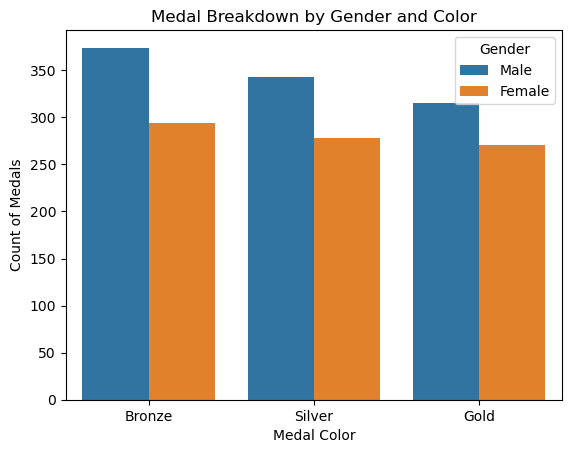

In [82]:
medals_pivot = pd.pivot_table(
    clean_medalists,
    values='Name',
    index='Gender',
    columns='Medal',
    aggfunc='count',
)
print(medals_pivot)
plt.figure()
sns.countplot(data = clean_medalists, x = "Medal", hue = 'Gender')
plt.xlabel('Medal Color')
plt.ylabel('Count of Medals')
plt.title('Medal Breakdown by Gender and Color')

#### The pivot table and graph above display that male athletes earn more medals than female athletes. In addition to that, there are certainly more bronze than silver medals, and more silver medals than gold.

Text(0.5, 1.0, 'Frequency of Total Medals per Competition')

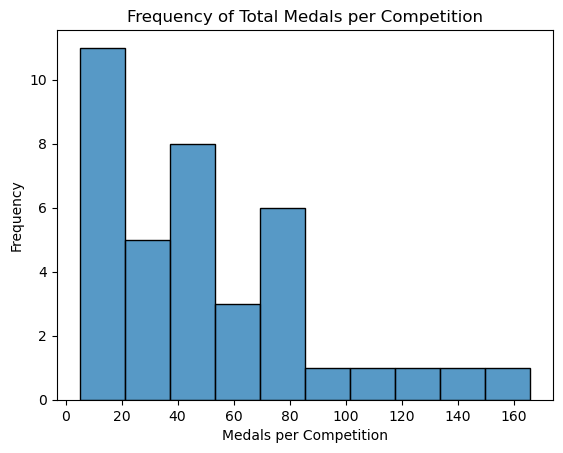

In [83]:
plt.figure()
sns.histplot(data = clean_medalists['Competition'].value_counts(), bins = 10)
plt.xlabel('Medals per Competition')
plt.ylabel('Frequency')
plt.title('Frequency of Total Medals per Competition')

### This chart above shows that most competitions give out fewer total medals, and the data is heavily skewed to the right, meaning that only a couple of competitions hand out significantly more medals.

Text(0.5, 1.0, 'Top 5 Comps with Least Medals')

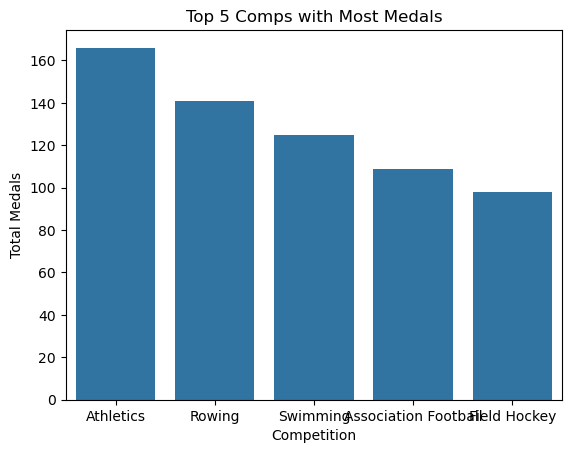

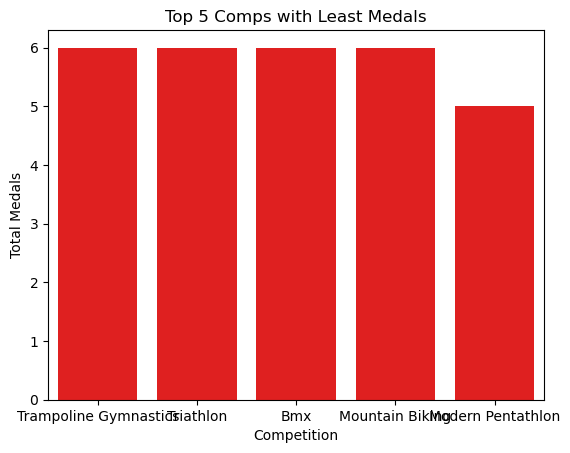

In [84]:
sorted_comp_medals = clean_medalists['Competition'].value_counts().sort_values(ascending=False)
sns.barplot(sorted_comp_medals.head(5))
plt.xlabel('Competition')
plt.ylabel('Total Medals')
plt.title('Top 5 Comps with Most Medals')
plt.figure()
sns.barplot(sorted_comp_medals.tail(5), color = 'red')
plt.xlabel('Competition')
plt.ylabel('Total Medals')
plt.title('Top 5 Comps with Least Medals')

### In these two plots, you can tell the drastic difference between the amount of medalists in some competitions versus others. Modern Pentathlon only had five medalists, and a handful of competitions only had 6. "Athletics" refers to a number of different competitions including track and field, so it makes sense that there are many different medalists, but team sports like rowing, association football, and field hockey all have more than tenfold the medalists of modern pentathlon.